# __SIMPLE LINEAR REGRESSION__

## __Importing Relevant Libraries!__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sy
from scipy import stats  
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

__Examine the Data using Scatterplots__

   Temp  Patients
0    19       294
1    23       344
2    20       360
3    24       417
4    21       359
5    26       422
6    20       333
7    25       443
8    22       350
9    29       401


C:\Users\bryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Max Temperature')

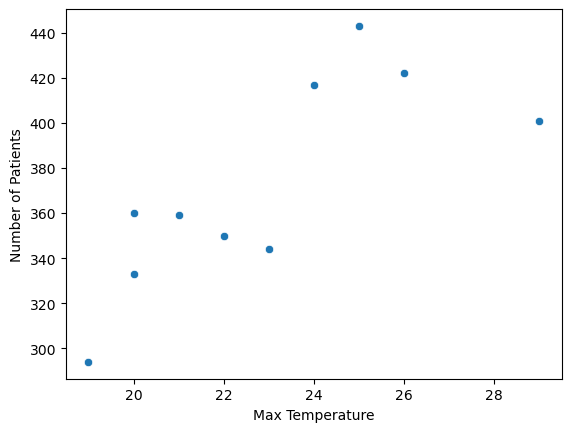

In [2]:
#Creating vectors of data
X = pd.Series([19,23,20,24,21,26,20,25,22,29],name="Temp")
Y = pd.Series([294,344,360,417,359,422,333,443,350,401],name="Patients")
DF = pd.concat([X,Y],axis='columns')
print(DF)

sns.scatterplot(X,Y)
plt.ylabel("Number of Patients")
plt.xlabel("Max Temperature")

__Correlation Matrix__
See covariance/correlation file + Tutorial 5 for explanation of functions.

In [3]:
Pearson = stats.pearsonr(X,Y)
correlation_matrix = DF.corr()
print(Pearson)
print('\n')
print ("Pearson Correlation Coefficient is = " + str(Pearson))
print (correlation_matrix)

PearsonRResult(statistic=0.776132371754146, pvalue=0.008303176815800149)


Pearson Correlation Coefficient is = PearsonRResult(statistic=0.776132371754146, pvalue=0.008303176815800149)
              Temp  Patients
Temp      1.000000  0.776132
Patients  0.776132  1.000000


__Create the OLS Model__

ols is the function to create an OLS model. It takes in dependent variable as a function of the independent variables. If you have multiple independent variables it could be Y~X+Z+A. data should be set equal to your dataframe.

fit() computes the regression model and returns results.
summary() displays the results.

In [4]:
model=ols('Y~X',data=DF)
results = model.fit()
#Need to run summary on the results variable because the fit() function computed the regression model.
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00830
Time:                        16:12:12   Log-Likelihood:                -47.480
No. Observations:                  10   AIC:                             98.96
Df Residuals:                       8   BIC:                             99.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.4477     76.430      1.419      0.1

C:\Users\bryan\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Create the OLS Model Part 2__
.summary2() is almost universally better. It gives the same info as summary() plus more. Most importantly the Scale which is the MSE.

In [5]:
print(results.summary2()) 

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.553  
Dependent Variable: Y                AIC:                98.9591
Date:               2023-10-19 16:12 BIC:                99.5643
No. Observations:   10               Log-Likelihood:     -47.480
Df Model:           1                F-statistic:        12.12  
Df Residuals:       8                Prob (F-statistic): 0.00830
R-squared:          0.602            Scale:              973.77 
-----------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept  108.4477   76.4300  1.4189  0.1937  -67.8001  284.6955
X           11.5219    3.3096  3.4813  0.0083    3.8899   19.1539
----------------------------------------------------------------
Omnibus:               0.850       Durbin-Watson:          1.374
Prob(Omnibus):         0.654       Ja

C:\Users\bryan\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


__Plotting the OLS Model__
regplot takes in the vectors of data along with various parameters and returns the axis for the linear regression.
For more info: https://seaborn.pydata.org/generated/seaborn.regplot.html

the .annotate function allows you to place text on the figure. (text = the text you want, xy = the coordinates of where you want to annotate, xycoords = the dataset you are working with, size = size of font.

Text(20, 420, '$\\hat{y}$=108.4+11.52x')

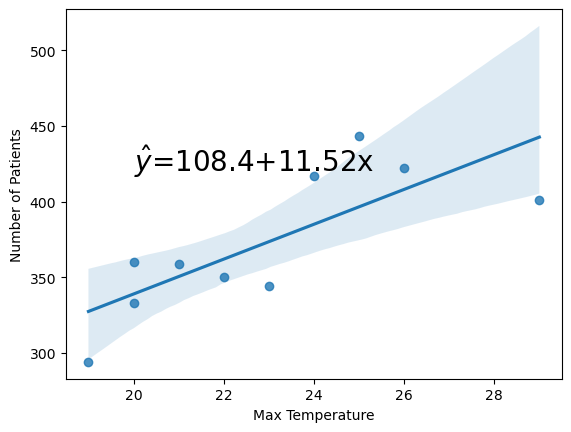

In [6]:
sns.regplot(x="Temp",y="Patients",data=DF)
plt.ylabel("Number of Patients")
plt.xlabel("Max Temperature")

plt.annotate(text='$\hat{y}$=108.4+11.52x',xy=(20,420),xycoords='data',size=20)

__Plotting the Prediction Intervals__
The .get_prediction will generate the corresponding confidence and prediction intervals from the linear regression model.

mean_ci_lower/upper refers to the confidence intervals
obs_ci_lower/upper refers to the prediction intervals

In [7]:
#Get the values for the confidence and prediction intervals
results.get_prediction(DF).summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,327.364454,16.247497,289.897660,364.831249,246.235246,408.493663
1,373.452193,9.873541,350.683767,396.220620,297.976442,448.927945
2,338.886389,13.765785,307.142432,370.630347,260.236109,417.536669
3,384.974128,10.518132,360.719272,409.228984,309.036747,460.911509
4,350.408324,11.701268,323.425151,377.391497,273.556002,427.260646
5,408.017998,14.235207,375.191551,440.844445,328.924614,487.111382
6,338.886389,13.765785,307.142432,370.630347,260.236109,417.536669
7,396.496063,12.069902,368.662818,424.329308,319.341172,473.650954
8,361.930259,10.307748,338.160549,385.699969,286.146442,437.714075
9,442.583802,22.471310,390.764868,494.402737,353.908046,531.259558


In [8]:
Predictions = results.get_prediction(exog=dict(X)).summary_frame(alpha=0.05)
print(Predictions)

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  327.364454  16.247497     289.897660     364.831249    246.235246   
1  373.452193   9.873541     350.683767     396.220620    297.976442   
2  338.886389  13.765785     307.142432     370.630347    260.236109   
3  384.974128  10.518132     360.719272     409.228984    309.036747   
4  350.408324  11.701268     323.425151     377.391497    273.556002   
5  408.017998  14.235207     375.191551     440.844445    328.924614   
6  338.886389  13.765785     307.142432     370.630347    260.236109   
7  396.496063  12.069902     368.662818     424.329308    319.341172   
8  361.930259  10.307748     338.160549     385.699969    286.146442   
9  442.583802  22.471310     390.764868     494.402737    353.908046   

   obs_ci_upper  
0    408.493663  
1    448.927945  
2    417.536669  
3    460.911509  
4    427.260646  
5    487.111382  
6    417.536669  
7    473.650954  
8    437.714075  
9    531.259558  


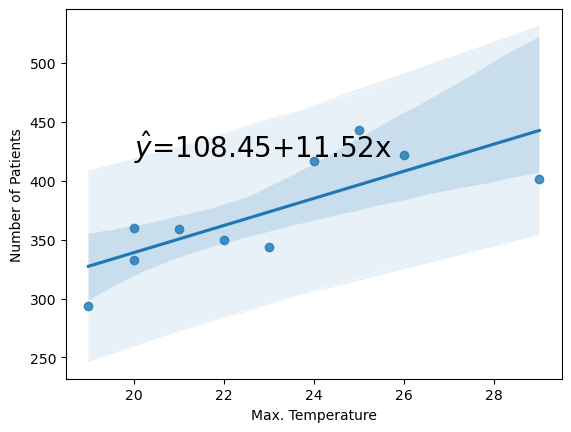

In [9]:
sns.regplot(x='Temp',y='Patients',data=DF)
plt.ylabel("Number of Patients")
plt.xlabel("Max. Temperature")
plt.annotate(text='$\hat{y}$=108.45+11.52x',xy=(20,420),xycoords='data',size=20)
plt.fill_between(DF['Temp'], Predictions['obs_ci_lower'], Predictions['obs_ci_upper'],alpha=.1)